# GSE Accession Analysis for human: Wordcloud for GSM Characteristics
This notebook took the first 10 GSE accession numbers of human species to retreive their respective GSM and looked at the wordcloud for characterstics.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
import re
import json

In [2]:
from tqdm import trange


In [3]:
def import_GSE():
    GREIN_data = pd.read_csv("data/GREIN_data.csv")
    GREIN_data = GREIN_data[GREIN_data.Species != 'Rattus norvegicus'] #drop brown rat
    GREIN_human = GREIN_data[GREIN_data.Species == 'Homo sapiens']
    GREIN_mouse = GREIN_data[GREIN_data.Species == 'Mus musculus']
    
    GSE_human = GREIN_human['GEO accession'].tolist()
    GSE_mouse = GREIN_mouse['GEO accession'].tolist()
    
    return GSE_human, GSE_mouse

In [4]:
print(len(import_GSE()))

2


In [5]:
def scrape_geo_data(geo_id):
    url = f"https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc={geo_id}"

    try:
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # Find all <a> tags with href attributes containing "GSM"
            gsm_links = soup.find_all('a', href=lambda href: href and href.startswith('/geo/query/acc.cgi?acc=GSM'))

            # Extract and store only the GSM values
            gsm_values = [link.text for link in gsm_links]

            return gsm_values

        else:
            return f"Failed to retrieve the page. Status code: {response.status_code}"

    except requests.exceptions.RequestException as e:
        return f"Error: {e}"

In [6]:
GSEs_human = import_GSE()[0]
GSM_human = []
for GSE in GSEs_human[:10]:
    GSMs_human = scrape_geo_data(GSE)
    GSM_human.append(GSMs_human)
    #data[GSE] = GSMs

In [7]:
if GSMs_human:
    GSM_human = [item for sublist in GSM_human for item in sublist] #flatten the list
    print(GSM_human)

['GSM2668081', 'GSM2668082', 'GSM2668083', 'GSM2668084', 'GSM2668085', 'GSM2668086', 'GSM2668087', 'GSM2668088', 'GSM2668089', 'GSM2670975', 'GSM2670976', 'GSM2670977', 'GSM2670978', 'GSM2670979', 'GSM2670980', 'GSM2670981', 'GSM2670982', 'GSM2670983', 'GSM2670984', 'GSM2670985', 'GSM2670986', 'GSM2670987', 'GSM2670988', 'GSM2670989', 'GSM2670990', 'GSM2670991', 'GSM2670992', 'GSM2670993', 'GSM2670994', 'GSM2670995', 'GSM2670996', 'GSM2670997', 'GSM2670998', 'GSM2670999', 'GSM2671000', 'GSM2671001', 'GSM2671002', 'GSM2671003', 'GSM2671004', 'GSM2671005', 'GSM2671006', 'GSM2722166', 'GSM2722167', 'GSM2670874', 'GSM2670875', 'GSM2670876', 'GSM2670877', 'GSM2670878', 'GSM2670879', 'GSM2670880', 'GSM2670881', 'GSM2670882', 'GSM2670883', 'GSM2670884', 'GSM2670885', 'GSM2670886', 'GSM2670887', 'GSM2670888', 'GSM2670929', 'GSM2670930', 'GSM2670931', 'GSM2670932', 'GSM2670933', 'GSM2670934', 'GSM2670935', 'GSM2670936', 'GSM2670937', 'GSM2670938', 'GSM2670939', 'GSM2670940', 'GSM2670941', 'GSM2

In [8]:
def save_results_to_file(results, filename):
    with open(filename, 'w', encoding='utf-8') as file:
        for result in results:
            file.write(result + '\n')

In [9]:
csv_file_path = "data/GSM_human.csv"

# with open(csv_file_path, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(GSM_human)

In [10]:
def scrape_characteristics(geo_id):
    url = f"https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc={geo_id}"

    try:
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            
            characteristics_dict = {}
            
            # Find the "Characteristics" label
            characteristics_label = soup.find('td', text='Characteristics')
            
            if characteristics_label:
                # Get the next sibling (which contains the characteristics content)
                characteristics_content = characteristics_label.find_next_sibling('td')
                characteristics_string = str(characteristics_content)

            return characteristics_string

        else:
            return f"Failed to retrieve the page. Status code: {response.status_code}"

    except requests.exceptions.RequestException as e:
        return f"Error: {e}"

In [11]:
def extract_characteristics(input_str):
    
    input_str = re.sub(r'<td[^>]*>', '', input_str) # remove <td> tags
    
    pattern = r'(\w+): ([^<]+)'
    matches = re.findall(pattern, input_str)

    characteristics_dictionary = dict(matches)
    
    return characteristics_dictionary

In [12]:
geo_id = "GSM2683998"
characteristics_string = scrape_characteristics(geo_id)
characteristics_dictionary = extract_characteristics(characteristics_string )
print("characteristics_dictionary:", characteristics_dictionary)

characteristics_dictionary: {'strain': 'C57BL/6J', 'age': '3 months', 'genotype': 'wild type'}


/tmp/ipykernel_766511/2193903069.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  characteristics_label = soup.find('td', text='Characteristics')


In [13]:
results = {}
print(GSM_human)

['GSM2668081', 'GSM2668082', 'GSM2668083', 'GSM2668084', 'GSM2668085', 'GSM2668086', 'GSM2668087', 'GSM2668088', 'GSM2668089', 'GSM2670975', 'GSM2670976', 'GSM2670977', 'GSM2670978', 'GSM2670979', 'GSM2670980', 'GSM2670981', 'GSM2670982', 'GSM2670983', 'GSM2670984', 'GSM2670985', 'GSM2670986', 'GSM2670987', 'GSM2670988', 'GSM2670989', 'GSM2670990', 'GSM2670991', 'GSM2670992', 'GSM2670993', 'GSM2670994', 'GSM2670995', 'GSM2670996', 'GSM2670997', 'GSM2670998', 'GSM2670999', 'GSM2671000', 'GSM2671001', 'GSM2671002', 'GSM2671003', 'GSM2671004', 'GSM2671005', 'GSM2671006', 'GSM2722166', 'GSM2722167', 'GSM2670874', 'GSM2670875', 'GSM2670876', 'GSM2670877', 'GSM2670878', 'GSM2670879', 'GSM2670880', 'GSM2670881', 'GSM2670882', 'GSM2670883', 'GSM2670884', 'GSM2670885', 'GSM2670886', 'GSM2670887', 'GSM2670888', 'GSM2670929', 'GSM2670930', 'GSM2670931', 'GSM2670932', 'GSM2670933', 'GSM2670934', 'GSM2670935', 'GSM2670936', 'GSM2670937', 'GSM2670938', 'GSM2670939', 'GSM2670940', 'GSM2670941', 'GSM2

In [14]:
for GSM in GSM_human:
    characteristics_string = scrape_characteristics(GSM)
    characteristics_dictionary = extract_characteristics(characteristics_string)
    results[GSM] = characteristics_dictionary
    #print(f"Characteristics for {GSM}: {characteristics_dictionary}")

/tmp/ipykernel_766511/2193903069.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  characteristics_label = soup.find('td', text='Characteristics')


In [15]:
json_file = "data/test_characteristics_human.json"

with open(json_file, "w") as file:
    json.dump(results, file)

print(f"Characteristics saved to {json_file}")

Characteristics saved to data/test_characteristics_human.json


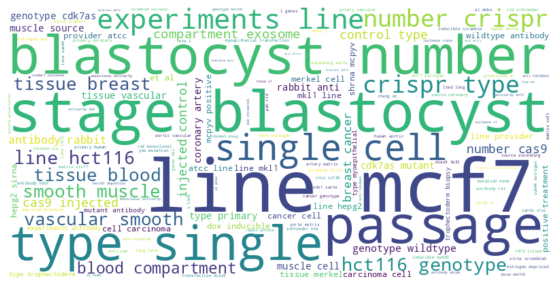

In [16]:
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

with open('data/test_characteristics_human.json', 'r') as json_file:
    data = json.load(json_file)

attribute_texts = []

for key, value in data.items():
    # Include the attribute key and its value
    attribute_text = f"{key}: {str(value)}"
    attribute_texts.append(attribute_text)

text_data = " ".join(attribute_texts)

text_data = text_data.lower()

text_data = remove_punctuation(text_data)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [17]:
def scrape_characteristics(geo_id):
    url = f"https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc={geo_id}"

    try:
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            
            characteristics_dict = {}
            
            # Find the "Characteristics" label
            characteristics_label = soup.find('td', text='Characteristics')
            
            if characteristics_label:
                # Get the next sibling (which contains the characteristics content)
                characteristics_content = characteristics_label.find_next_sibling('td')
                characteristics_string = str(characteristics_content)

            return characteristics_string

        else:
            return f"Failed to retrieve the page. Status code: {response.status_code}"

    except requests.exceptions.RequestException as e:
        return f"Error: {e}"

In [18]:
def extract_characteristics(input_str):
    
    input_str = re.sub(r'<td[^>]*>', '', input_str) # remove <td> tags
    
    pattern = r'(\w+): ([^<]+)'
    matches = re.findall(pattern, input_str)
    
    characteristics_dictionary = {}
    
    for attribute, value in matches:
        characteristics_dictionary[attribute] = characteristics_dictionary.get(attribute, 0) + 1


   # characteristics_dictionary = dict(matches)
    
    return characteristics_dictionary

In [ ]:
attribute_counts = {}

for geo_id in GSM_human:
    characteristics_string = scrape_characteristics(geo_id)
    characteristics_dictionary = extract_characteristics(characteristics_string)

    for attribute in characteristics_dictionary:
 
        if attribute in attribute_counts:
           
            attribute_counts[attribute] += 1
        else:

            attribute_counts[attribute] = 1

    #print(f"Characteristics for {geo_id}: {characteristics_dictionary}")

print("Attribute Counts:")
for attribute, count in attribute_counts.items():
    print(f"{attribute}: {count}")


/tmp/ipykernel_766511/2193903069.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  characteristics_label = soup.find('td', text='Characteristics')
